In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer, MinMaxScaler
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.datasets import boston_housing, mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [38]:
# model = Sequential()
# model.add(Dense(400, input_shape=(784, ), activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(400, activation='relu'))
# model.add(Dense(784, activation='relu'))

inpt = Input(shape=(784, ))
inner = Dense(300, activation='sigmoid')(inpt)
inner = Dense(150, activation='sigmoid')(inner)
code = Dense(2, activation='sigmoid')(inner)
inner = Dense(150, activation='sigmoid')(code)
inner = Dense(300, activation='sigmoid')(inner)
decode = Dense(784, activation='sigmoid')(inner)

autoencoder = Model(inpt, decode)
encoder = Model(inpt, code)

In [39]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_35 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 302       
_________________________________________________________________
dense_37 (Dense)             (None, 150)               450       
_________________________________________________________________
dense_38 (Dense)             (None, 300)               45300     
_________________________________________________________________
dense_39 (Dense)             (None, 784)               235984    
Total para

In [40]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_35 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 302       
Total params: 280,952
Trainable params: 280,952
Non-trainable params: 0
_________________________________________________________________


In [41]:
autoencoder.compile(loss="binary_crossentropy", 
                 optimizer='adam')

In [42]:
model.fit(x_train, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 14s 231us/step - loss: 2874.0705
Epoch 2/10
60000/60000 [==============================] - 13s 223us/step - loss: 2949.9649
Epoch 3/10
60000/60000 [==============================] - 14s 227us/step - loss: 2958.6945
Epoch 4/10
60000/60000 [==============================] - 13s 223us/step - loss: 3009.1767
Epoch 5/10
60000/60000 [==============================] - 13s 225us/step - loss: 2956.3930
Epoch 6/10
60000/60000 [==============================] - 13s 225us/step - loss: 2882.7399
Epoch 7/10
60000/60000 [==============================] - 14s 225us/step - loss: 2874.1891
Epoch 8/10
60000/60000 [==============================] - 14s 226us/step - loss: 2843.9117
Epoch 9/10
60000/60000 [==============================] - 14s 226us/step - loss: 2826.2436
Epoch 10/10
60000/60000 [==============================] - 14s 227us/step - loss: 2811.0035


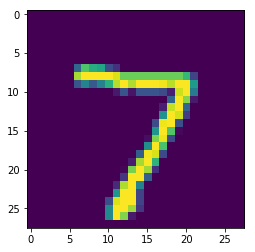

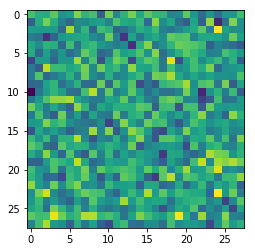

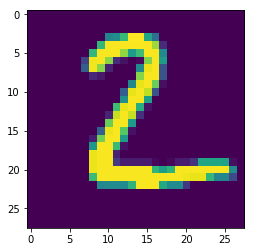

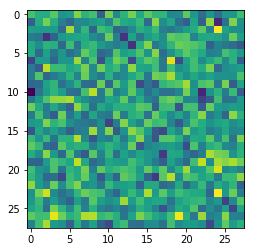

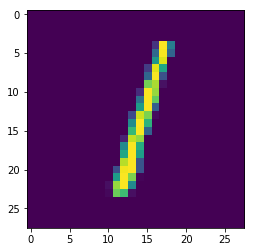

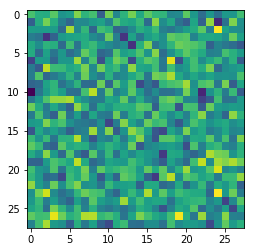

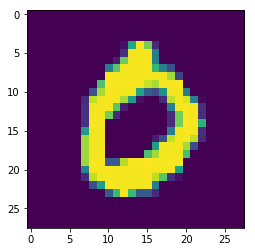

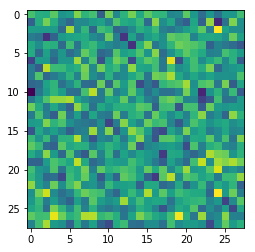

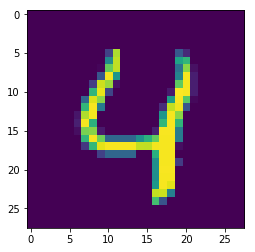

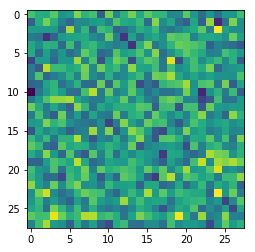

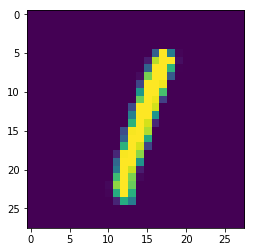

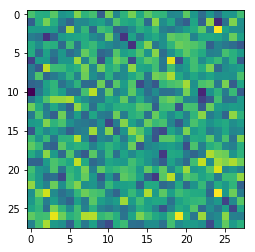

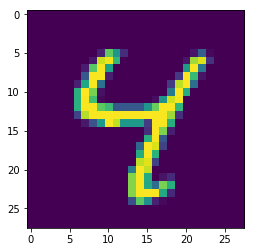

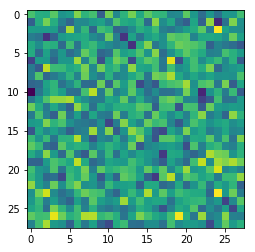

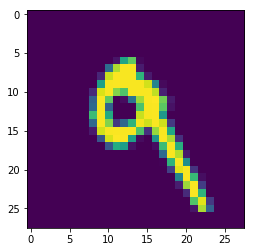

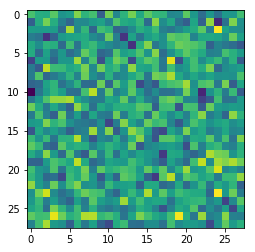

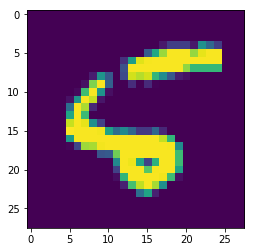

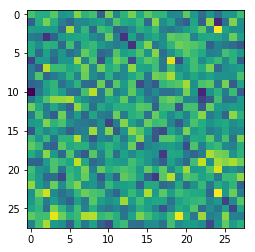

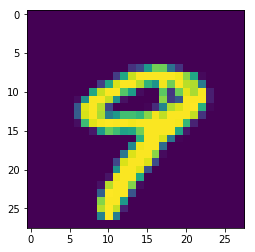

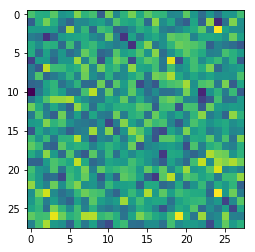

In [43]:
for x, y in list(zip(x_test, y_test))[:10]:
    img = x.reshape(28, 28)
    pred = autoencoder.predict(x.reshape(1, -1))
    pred = pred.reshape((28, 28))
    plt.imshow(img)
    plt.show()
    
    plt.imshow(pred)
    plt.show()
    print()